In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from pandas.tseries.offsets import MonthEnd
import seaborn as sns

plt.style.use("ggplot")
register_matplotlib_converters()

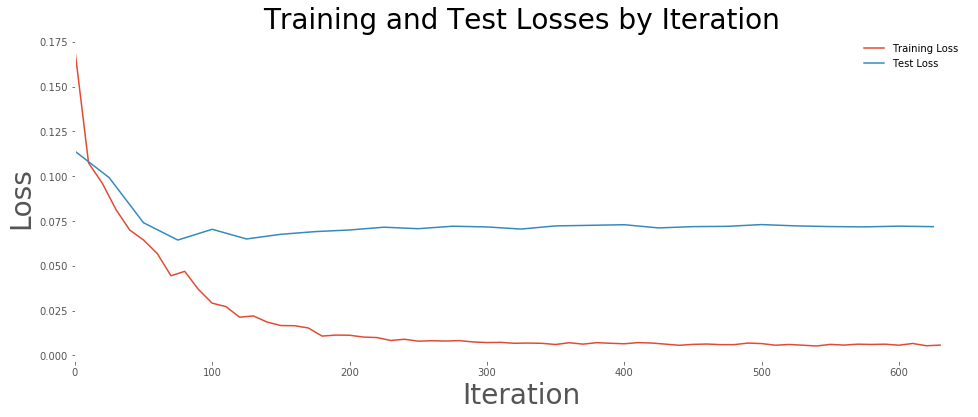

In [11]:
train_loss_df = pd.read_csv("./input/train-loss.csv").astype(float)
test_loss_df = pd.read_csv("./input/test-loss.csv").astype(float)

f, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(train_loss_df["Epoch"], train_loss_df["Training Loss"], label="Training Loss")
ax.plot(test_loss_df["Epoch"], test_loss_df["Test Loss"], label="Test Loss")

ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
plt.title("Training and Test Losses by Iteration")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.xlim(0, 650)
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/loss.png", bbox_inches="tight")

In [12]:
train_pred_df = pd.read_csv("./input/train-pred.csv").astype(float)
test_pred_df = pd.read_csv("./input/test-pred.csv").astype(float)
valid_pred_df = pd.read_csv("./input/validation-pred.csv").astype(float)

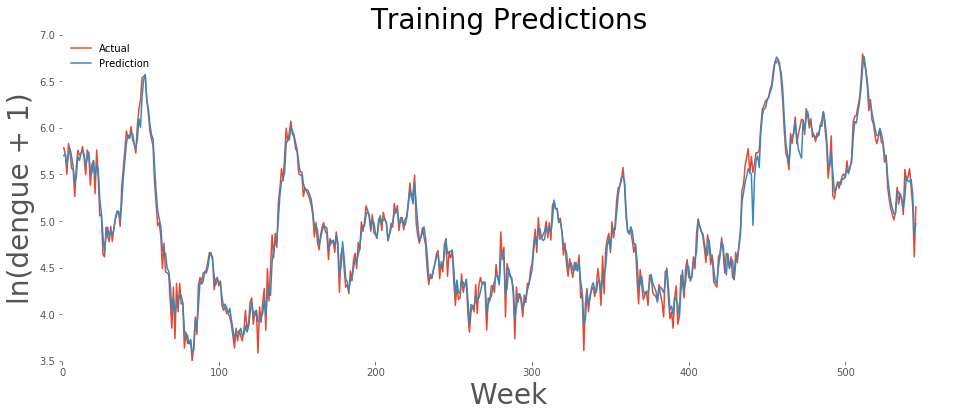

In [13]:
f, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(train_pred_df["Week"], train_pred_df["Train (Actual)"], label="Actual")
ax.plot(train_pred_df["Week"], train_pred_df["Train (Pred)"], label="Prediction")
ax.set_xlabel("Week")
ax.set_ylabel("ln(dengue + 1)")

plt.title("Training Predictions")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.xlim(0, 570)
plt.ylim(3.5, 7)
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/train-pred.png", bbox_inches="tight")

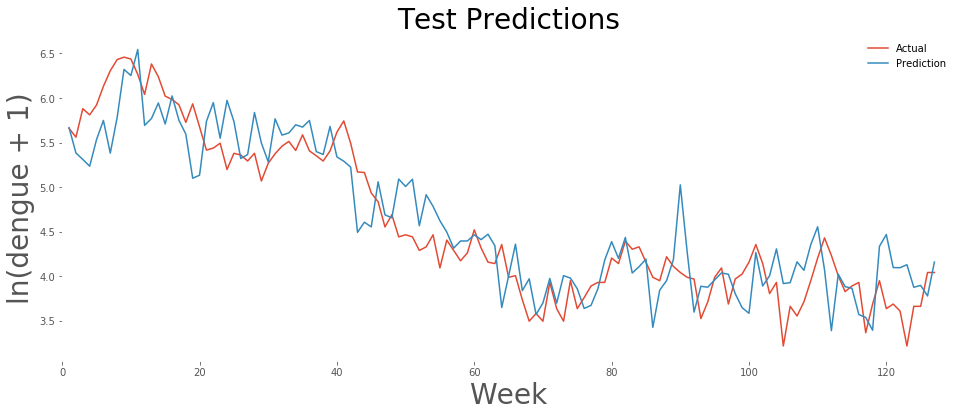

In [14]:
f, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(test_pred_df["Week"], test_pred_df["Test (Actual)"], label="Actual")
ax.plot(test_pred_df["Week"], test_pred_df["Test (Pred)"], label="Prediction")

ax.set_xlabel("Week")
ax.set_ylabel("ln(dengue + 1)")
plt.title("Test Predictions")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.xlim(0, 130)
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/test-pred.png", bbox_inches="tight")

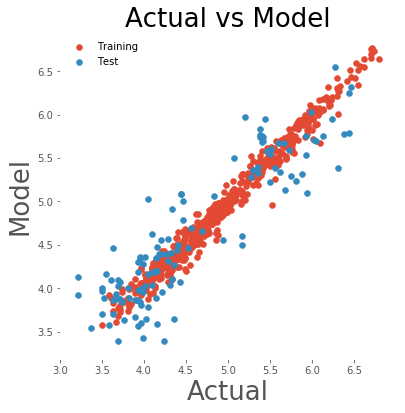

In [15]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(train_pred_df["Train (Actual)"], train_pred_df["Train (Pred)"], label="Training")
ax.scatter(test_pred_df["Test (Actual)"], test_pred_df["Test (Pred)"], label="Test")

ax.set_xlabel("Actual")
ax.set_ylabel("Model")
plt.title("Actual vs Model")

ax.xaxis.label.set_fontsize(26)
ax.yaxis.label.set_fontsize(26)
ax.title.set_fontsize(26)

ax.set_facecolor((1, 1, 1))
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/scatter.png", bbox_inches="tight")

In [16]:
train_lag_df = pd.read_csv("./input/train-lag.csv").astype(float)
test_lag_df = pd.read_csv("./input/test-lag.csv").astype(float)

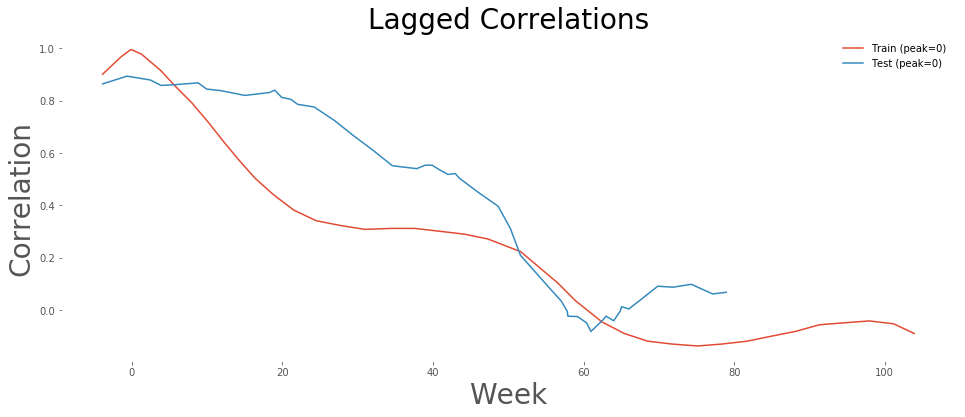

In [17]:
f, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(train_lag_df["x"], train_lag_df["Train"], label="Train (peak=0)")
ax.plot(test_lag_df["x"], test_lag_df["Test"], label="Test (peak=0)")

ax.set_xlabel("Week")
ax.set_ylabel("Correlation")
plt.title("Lagged Correlations")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/autocaffe-lag.png", bbox_inches="tight")

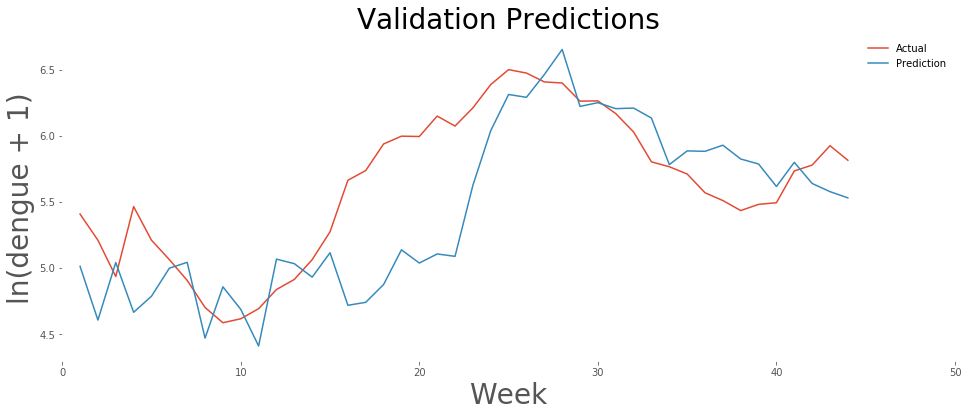

In [18]:
f, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(valid_pred_df["Week"], valid_pred_df["Validation (Actual)"], label="Actual")
ax.plot(valid_pred_df["Week"], valid_pred_df["Validation (Pred)"], label="Prediction")

ax.set_xlabel("Week")
ax.set_ylabel("ln(dengue + 1)")
plt.title("Validation Predictions")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.xlim(0, 50)
plt.legend(edgecolor="None", facecolor=(1, 1, 1))
plt.grid(False)

plt.savefig("./results/valid-pred.png", bbox_inches="tight")

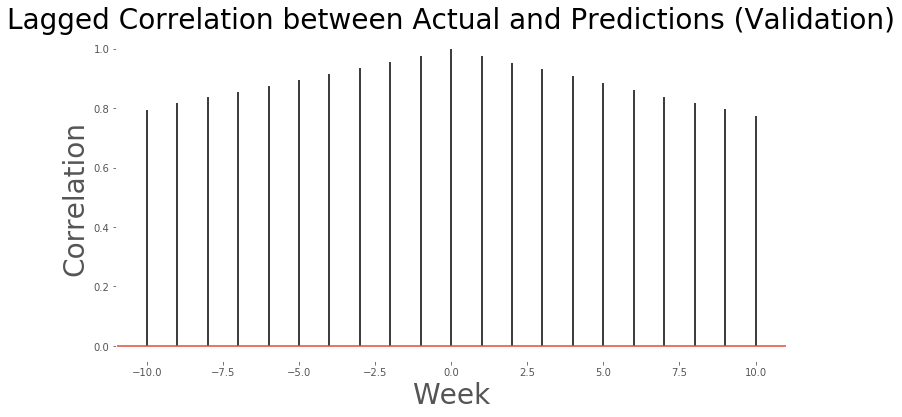

In [20]:
f, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.xcorr(valid_pred_df["Validation (Actual)"], valid_pred_df["Validation (Pred)"], normed=True)

ax.set_xlabel("Week")
ax.set_ylabel("Correlation")
plt.title("Lagged Correlation between Actual and Predictions (Validation)")

ax.xaxis.label.set_fontsize(28)
ax.yaxis.label.set_fontsize(28)
ax.title.set_fontsize(28)

ax.set_facecolor((1, 1, 1))
plt.grid(False)

plt.savefig("./results/lagged_corr.png", bbox_inches="tight")

Peak value at 0 suggests 0-week lag in validation predictions